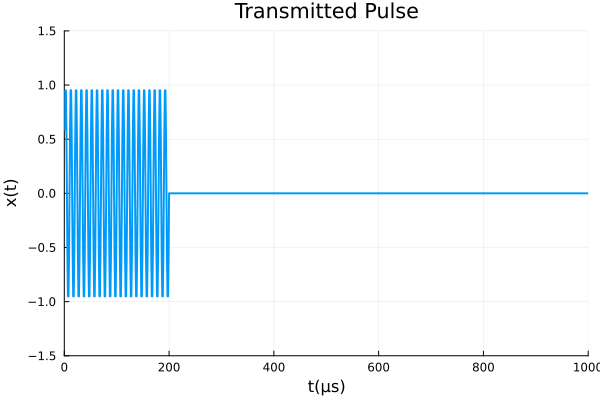

In [45]:
using Plots

function generate_oscillating_signal_with_pulse(total_duration_micros::Int, oscillation_period_micros::Int, pulse_start_micros::Int, pulse_end_micros::Int, sampling_rate::Float64)
    oscillation_period_samples = Int(oscillation_period_micros * sampling_rate / 1e6)
    total_duration_samples = Int(total_duration_micros * sampling_rate / 1e6)

    time_axis_micros = (1:total_duration_samples) / sampling_rate * 1e6
    oscillating_signal = sin.(2π / oscillation_period_samples .* (1:total_duration_samples))

    # Set pulse to 0 from pulse_start to pulse_end
    pulse_start_sample = Int(pulse_start_micros * sampling_rate / 1e6)
    pulse_end_sample = Int(pulse_end_micros * sampling_rate / 1e6)
    oscillating_signal[pulse_start_sample:pulse_end_sample] .= 0

    return time_axis_micros, oscillating_signal
end

# Parameters
total_duration_micros = 1000  # Total duration of the signal
oscillation_period_micros = 10  # Oscillation period in microseconds
pulse_start_micros = 200  # Start of the pulse
pulse_end_micros = 1000  # End of the pulse
sampling_rate = 1e6  # Sampling rate in Hz

# Generate oscillating signal with pulse
time_axis_micros, signal_with_pulse = generate_oscillating_signal_with_pulse(total_duration_micros, oscillation_period_micros, pulse_start_micros, pulse_end_micros, sampling_rate)

# Plot the signal with x-axis and y-axis limits
plot(time_axis_micros, signal_with_pulse, xlabel="t(μs)", ylabel="x(t)", title="Transmitted Pulse"
        , linewidth=2
        , ylims=(-1.5, 1.5)
        , xlims=(0, 1000)
        , legend=:false
)


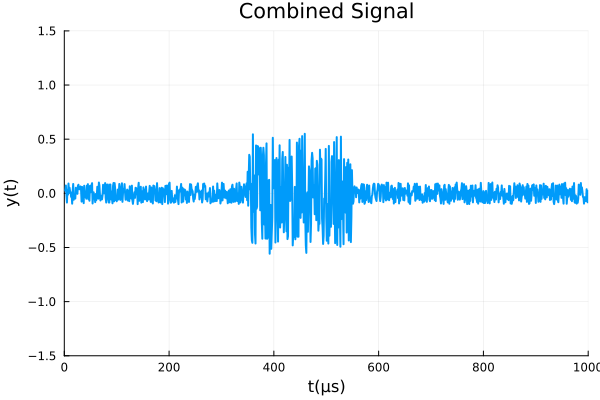

In [47]:
using Plots

function generate_pulse(total_duration_micros::Int, pulse_start_micros::Int, pulse_duration_micros::Int, max_pulse_amplitude::Float64, sampling_rate::Float64)
    total_duration_samples = Int(total_duration_micros * sampling_rate / 1e6)

    time_axis_micros = (1:total_duration_samples) / sampling_rate * 1e6

    # Create a pulse starting at pulse_start with pulse_duration
    pulse_start_sample = Int(pulse_start_micros * sampling_rate / 1e6)
    pulse_duration_samples = Int(pulse_duration_micros * sampling_rate / 1e6)
    pulse = max_pulse_amplitude * (2 * rand(Float64, pulse_duration_samples) .- 1)

    # Place the pulse in the signal
    signal_with_pulse = zeros(Float64, total_duration_samples)
    signal_with_pulse[pulse_start_sample:pulse_start_sample+pulse_duration_samples-1] .= pulse

    return time_axis_micros, signal_with_pulse
end

function generate_noise(total_duration_micros::Int, max_noise_amplitude::Float64, sampling_rate::Float64)
    total_duration_samples = Int(total_duration_micros * sampling_rate / 1e6)

    # Generate noise between -max_noise_amplitude and max_noise_amplitude
    noise = 2 * max_noise_amplitude * (rand(Float64, total_duration_samples) .- 0.5)

    return noise
end

# Parameters
total_duration_micros = 1000  # Total duration of the signal
pulse_start_micros = 350  # Start of the pulse
pulse_duration_micros = 200  # Duration of the pulse
max_pulse_amplitude = 0.5  # Maximum amplitude of the pulse
max_noise_amplitude = 0.1  # Maximum amplitude of the noise
sampling_rate = 1e6  # Sampling rate in Hz

# Generate pulse
time_axis_micros_pulse, signal_with_pulse = generate_pulse(total_duration_micros, pulse_start_micros, pulse_duration_micros, max_pulse_amplitude, sampling_rate)

# Generate noise
noise = generate_noise(total_duration_micros, max_noise_amplitude, sampling_rate)

# Combine pulse and noise
signal_with_pulse_and_noise = signal_with_pulse + noise

# Plot the pulse and noise separately
plot(time_axis_micros_pulse, signal_with_pulse, xlabel="t(μs)", ylabel="x(t)", title="Transmitted Pulse",
    linewidth=2, ylims=(-1.5, 1.5), xlims=(0, 1000), legend=:false)

plot(time_axis_micros_pulse, noise, xlabel="t(μs)", ylabel="n(t)", title="Generated Noise",
    linewidth=2, ylims=(-0.3, 0.3), xlims=(0, 1000), legend=:false)

# Plot the combined signal
plot(time_axis_micros_pulse, signal_with_pulse_and_noise, xlabel="t(μs)", ylabel="y(t)", title="Combined Signal",
    linewidth=2, ylims=(-1.5, 1.5), xlims=(0, 1000), legend=:false)
